In [4]:
import json
# import pandas as pd
import pickle
import h5py
import re
from utils import img_data_2_mini_batch, imgs2batch
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torchvision import transforms
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from utils import imread

%matplotlib inline
import torch.nn.functional as F
import sys, os
from IPython.display import display, HTML
from data_loader import VQADataSet
%reload_ext autoreload
%autoreload 2
pp = lambda parsed: print(json.dumps(parsed, indent=4, sort_keys=True))

## Data Load

In [5]:
pp = lambda parsed: print(json.dumps(parsed, indent=4, sort_keys=True))
ann_path = './data/v2_mscoco_val2014_annotations.json'
q_path   = './data/v2_OpenEnded_mscoco_val2014_questions.json'
i_path   = './data/val2014'
i_prefix = 'COCO_val2014_'
assert(os.path.exists(ann_path))
assert(os.path.exists(q_path))
assert(os.path.exists(i_path))

## Annotations

In [6]:
ann_json = None
with open(ann_path, 'r') as ann_f:
    ann_json = json.load(ann_f)
print(len(ann_json))

5


In [9]:
ANN_ID = 2
print(ann_json.keys())
ann = ann_json['annotations']
print(ann_json['data_type'], ann_json['data_subtype'], print(type(ann)))
a1 = ann[ANN_ID]

pp(a1)


dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type'])
<class 'list'>
mscoco val2014 None
{
    "answer_type": "other",
    "answers": [
        {
            "answer": "table",
            "answer_confidence": "yes",
            "answer_id": 1
        },
        {
            "answer": "table",
            "answer_confidence": "yes",
            "answer_id": 2
        },
        {
            "answer": "table",
            "answer_confidence": "yes",
            "answer_id": 3
        },
        {
            "answer": "picnic table",
            "answer_confidence": "yes",
            "answer_id": 4
        },
        {
            "answer": "picnic table",
            "answer_confidence": "yes",
            "answer_id": 5
        },
        {
            "answer": "picnic table",
            "answer_confidence": "yes",
            "answer_id": 6
        },
        {
            "answer": "picnic table",
            "answer_confidence": "yes",
            "answer_

## Questions

In [7]:
q_json = None
with open(q_path, 'r') as q_f:
    q_json = json.load(q_f);
qdf = pd.DataFrame(q_json['questions'])

In [8]:
qid = a1['question_id']
print('qid', qid)

print(q_json.keys())
print(q_json['task_type'], q_json['data_subtype'],q_json['data_type'])
q = q_json['questions']
print(type(q), len(q))
# print(q[0])
print()
print(qdf.query('question_id == ' + str(qid)))
# # print(qdf)
# display(qdf)

print(len(q_json['questions'][0]))
print(q_json['questions'][0])

qid 262148001
dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])
Open-Ended val2014 mscoco
<class 'list'> 214354

   image_id                                      question  question_id
1    262148  What are the people in the background doing?    262148001
3
{'image_id': 262148, 'question': 'Where is he looking?', 'question_id': 262148000}


## Images

12
262148
000000262148
./data/val2014/COCO_val2014_000000262148.jpg


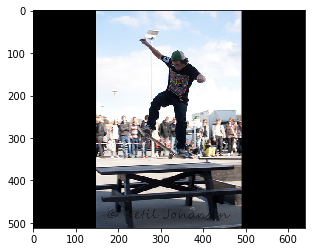

In [9]:
eg = '000000000192'
total = len(eg)
print(total)
img_id = str(a1['image_id'])
print(img_id)
full_img_id = '0'*(total-len(img_id)) + img_id
print(full_img_id)

img_f = i_path + "/" + i_prefix + full_img_id + ".jpg"
print(img_f)
assert(os.path.exists(img_f))
pil_im = Image.open(img_f, 'r')
imshow(np.asarray(pil_im))

In [10]:
import time
t0 = time.time()
x = imread(img_f)
print(x.shape)
print(time.time()-t0)


(3, 224, 224)
0.14045143127441406


In [ ]:
# help(Data.DataLoader)